In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

In [4]:
X

array([[ 1.20650139,  1.603969  ],
       [ 0.6110504 , -2.78648762],
       [-1.17092512, -1.01786952],
       ...,
       [ 0.56645767,  0.60243537],
       [ 0.94745391, -0.25527773],
       [-0.5665826 , -1.13819357]])

In [5]:
y

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [6]:
pd.DataFrame(X)[0]

0      1.206501
1      0.611050
2     -1.170925
3      0.193681
4      0.453140
         ...   
995    0.554227
996    1.395569
997    0.566458
998    0.947454
999   -0.566583
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

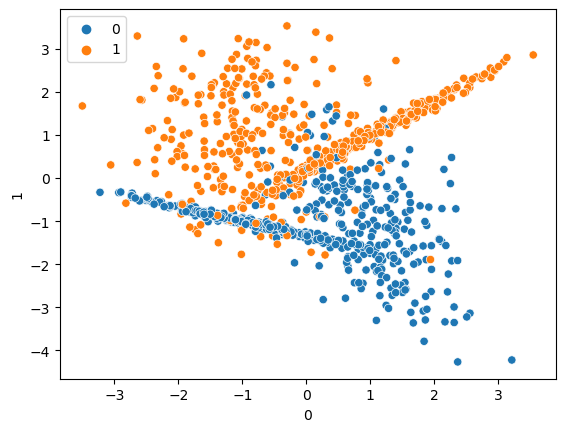

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [9]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
svc.coef_

array([[-0.12469946,  1.56251297]])

In [11]:
y_pred = svc.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       127
           1       0.88      0.86      0.87       123

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250


[[113  14]
 [ 17 106]]


In [13]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train, y_train)

y_pred2 = polynomial.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       127
           1       0.81      0.95      0.88       123

    accuracy                           0.87       250
   macro avg       0.88      0.87      0.87       250
weighted avg       0.88      0.87      0.87       250

[[100  27]
 [  6 117]]


In [15]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)

y_pred3 = sigmoid.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       127
           1       0.68      0.75      0.71       123

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.70       250
weighted avg       0.71      0.70      0.70       250

[[84 43]
 [31 92]]


In [17]:
sigmoid.intercept_

array([2.2656622])

# Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

In [19]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, cv=5, verbose=3)

In [20]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.807 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.940 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [21]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [22]:
y_pred4 = grid.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       127
           1       0.91      0.96      0.93       123

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[115  12]
 [  5 118]]
